In [15]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [34]:
model = Sequential()
model.add(MaxPooling2D(pool_size=2,input_shape=(320, 240, 3)))
model.add(Conv2D(3, kernel_size=(5,5), activation='relu',padding = 'Same'))
model.add(Conv2D(16,kernel_size=(5,5),activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',padding = 'Same'))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_15 (MaxPooling (None, 160, 120, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 160, 120, 3)       228       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 160, 120, 16)      1216      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 80, 60, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 80, 60, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 80, 60, 32)        12832     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 80, 60, 32)       

In [36]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.20)

train_generator = train_datagen.flow_from_directory(directory ='../audio_data/juyeon/train_image',
                                                    subset = 'training',   
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (320,240))

valid_generator = train_datagen.flow_from_directory(directory = '../audio_data/juyeon/train_image',
                                                    subset = 'validation',
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (320,240))

Found 4068 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.


In [ ]:
os.listdir('../audio_data/train_Mel')

In [ ]:
os.rmdir('../audio_data/train_Mel/.ipynb_checkpoints')

In [ ]:
for i in tqdm(range(train_generator.n)):
    x, y = train_generator.next()
#     print(x.shape, i)
    print(x)

In [ ]:
for i in tqdm(range(valid_generator.n)):
    x, y = valid_generator.next()
#     print(x.shape, i)

In [ ]:
train_generator.filepaths[3804]

In [ ]:
train_generator.filenames[3818]

In [ ]:
import os
os.path.isfile('../audio_data/juyeon/train_image/1/97wn.jpg')
os.remove('../audio_data/juyeon/train_image/1/97wn.jpg')

In [ ]:
train_generator.class_indices

In [37]:
# fig_generator
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = '../superjuyeon/check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=5, 
                                   min_lr=1e-8)

es = EarlyStopping(patience=50, verbose=1)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//batch_size,
    epochs=200,
    validation_data=valid_generator,
    validation_steps=valid_generator.n//batch_size,
    callbacks=[es,cp,reduceLROnPlat]
)
model.summary()

Epoch 1/200
127/127 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7168
Epoch 00001: val_accuracy improved from -inf to 0.73185, saving model to ../superjuyeon/check.h5
127/127 [==============================] - 14s 110ms/step - loss: 0.5544 - accuracy: 0.7168 - val_loss: 0.6102 - val_accuracy: 0.7319
Epoch 2/200
127/127 [==============================] - ETA: 0s - loss: 0.4579 - accuracy: 0.7864
Epoch 00002: val_accuracy did not improve from 0.73185
127/127 [==============================] - 13s 104ms/step - loss: 0.4579 - accuracy: 0.7864 - val_loss: 0.5969 - val_accuracy: 0.7248
Epoch 3/200
127/127 [==============================] - ETA: 0s - loss: 0.3577 - accuracy: 0.8389
Epoch 00003: val_accuracy improved from 0.73185 to 0.77218, saving model to ../superjuyeon/check.h5
127/127 [==============================] - 14s 113ms/step - loss: 0.3577 - accuracy: 0.8389 - val_loss: 0.6597 - val_accuracy: 0.7722
Epoch 4/200
127/127 [==============================] - 

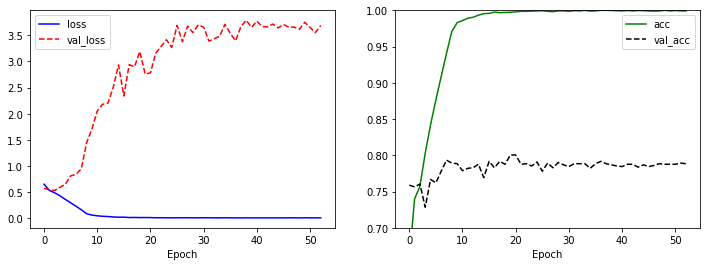

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
 
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'acc')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.ylim([0.7, 1])
plt.legend()

plt.show()

In [13]:
results = model.evaluate(valid_generator)
print('Test accuracy: ', results[1])

40/40 [==============================] - 3s 80ms/step - loss: 3.6620 - accuracy: 0.7890
Test accuracy:  0.7889763712882996


In [14]:
model.save('../models/audio_models/CNN.h5')